# Step by step

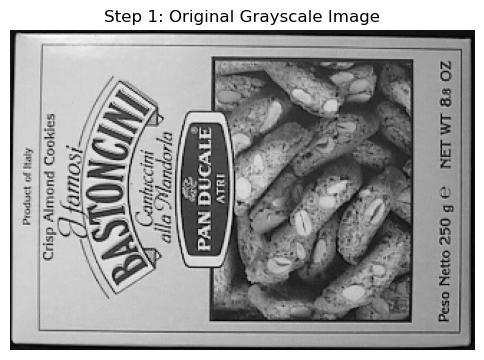

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# =======================
# Step 1: Identify Distinctive Regions
# =======================
# Load the image in grayscale mode.
img = cv2.imread(r"C:\Users\User\Downloads\box.png", cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Error: 'image.jpg' not found.")
    exit()

# Display the original image.
plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title("Step 1: Original Grayscale Image")
plt.axis('off')
plt.show()

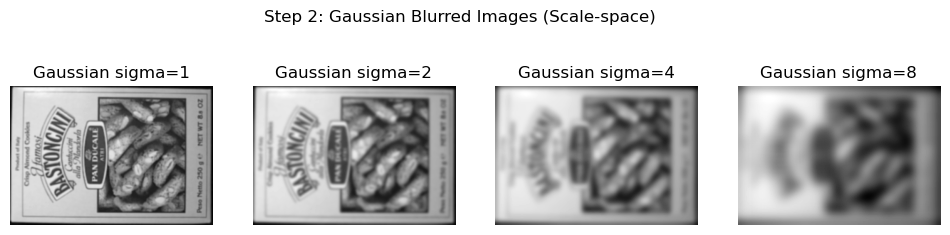

In [3]:
# =======================
# Step 2: Scale-space Extrema Detection
# =======================
# Build a scale-space pyramid using Gaussian blurring with different sigma values.
sigma_values = [1, 2, 4, 8]  # Example sigma values for different scales
gaussian_images = []
for sigma in sigma_values:
    blurred = cv2.GaussianBlur(img, (0, 0), sigmaX=sigma)
    gaussian_images.append(blurred)

# Display the Gaussian blurred images.
plt.figure(figsize=(12,3))
for i, sigma in enumerate(sigma_values):
    plt.subplot(1, len(sigma_values), i+1)
    plt.imshow(gaussian_images[i], cmap='gray')
    plt.title(f'Gaussian sigma={sigma}')
    plt.axis('off')
plt.suptitle("Step 2: Gaussian Blurred Images (Scale-space)")
plt.show()

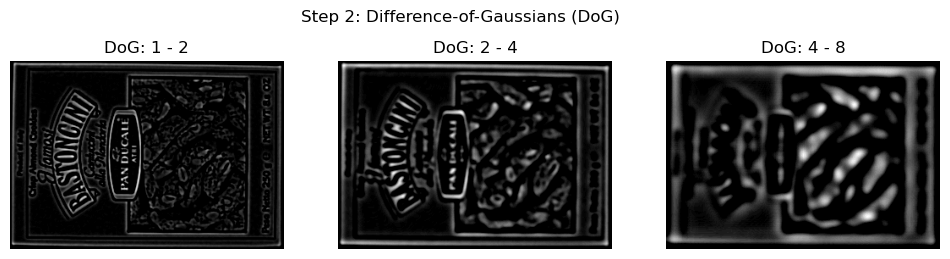

In [4]:
# Compute Difference-of-Gaussians (DoG) images between adjacent scales.
dog_images = []
for i in range(1, len(gaussian_images)):
    dog = cv2.subtract(gaussian_images[i-1], gaussian_images[i])
    dog_images.append(dog)

# Display the DoG images.
plt.figure(figsize=(12,3))
for i, dog in enumerate(dog_images):
    plt.subplot(1, len(dog_images), i+1)
    plt.imshow(dog, cmap='gray')
    plt.title(f'DoG: {sigma_values[i]} - {sigma_values[i+1]}')
    plt.axis('off')
plt.suptitle("Step 2: Difference-of-Gaussians (DoG)")
plt.show()

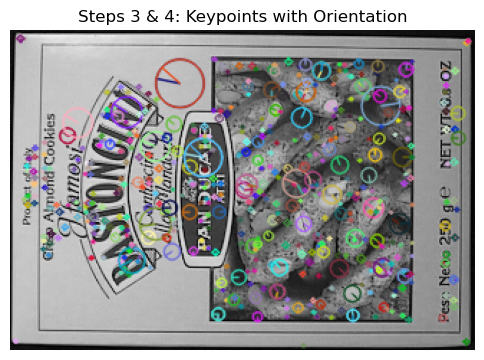

In [5]:
# =======================
# Steps 3, 4, and 5: Keypoint Localization, Orientation Assignment, and Descriptor Creation
# =======================
# Initialize the SIFT detector.
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors.
# - Keypoint Localization: SIFT finds candidate keypoints and refines their locations.
# - Orientation Assignment: It assigns a dominant orientation to each keypoint.
# - Keypoint Descriptor: It builds a feature descriptor for each keypoint.
keypoints, descriptors = sift.detectAndCompute(img, None)

# Draw keypoints on the image with rich keypoint information (size and orientation).
img_keypoints = cv2.drawKeypoints(
    img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Display the image with keypoints.
plt.figure(figsize=(6,6))
plt.imshow(img_keypoints, cmap='gray')
plt.title("Steps 3 & 4: Keypoints with Orientation")
plt.axis('off')
plt.show()

In [6]:
# Display the number of keypoints and a sample of descriptor data.
print("Step 3: Number of keypoints detected:", len(keypoints))
if descriptors is not None:
    print("Step 5: Descriptor shape (each row corresponds to a keypoint):", descriptors.shape)
    print("\nSample descriptor vectors (first 5):")
    print(descriptors[:5])
else:
    print("No descriptors computed.")

Step 3: Number of keypoints detected: 604
Step 5: Descriptor shape (each row corresponds to a keypoint): (604, 128)

Sample descriptor vectors (first 5):
[[  0.   0.   0.   0.   0.   0.   0.   0.   2.   0.   0.   0.   0.   0.
    1.  11.   1.   0.   0.   0.   0.   0.  27.  19.   0.   0.   0.   0.
    0.   0.  57.  11.  15.   0.   0.   0.   0.   0.   0.   8. 154.   2.
    0.   0.   0.   0.  18. 164.  33.   1.   0.   0.   0.   0. 164. 164.
    0.   0.   1.   0.   0.   0. 164.  56.  38.   4.   0.   0.   0.   0.
    0.   2. 164.  64.   0.   0.   0.   0.   1.  55. 154.  35.   2.   0.
    0.   0.  17.  43.   1.   6.   6.   0.   0.   0.  13.   4.  18.   2.
    0.   0.   0.   0.   0.   1. 164.  63.   0.   0.   0.   0.   0.   0.
  164.  37.   0.   0.   0.   0.   0.   0.   5.   4.   1.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.
    3.   4.   0.   0.   0.   0.   0.   0.  30.  14.   0.   0.   0.   0.
    0.   0.  68.  27.  12.   0.   0.   0.

# Task 1

In [10]:
import cv2
import numpy as np

# Load an image

gray = cv2.imread(r"C:\Users\User\Downloads\img11.jpeg", cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector

sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors

keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw keypoints on the image

img_keypoints = cv2.drawKeypoints(gray, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('SIFT Keypoints', img_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Task 2

In [11]:
# Load two images

gray1 = cv2.imread(r"C:\Users\User\Downloads\box_in_scene.png", cv2.IMREAD_GRAYSCALE)

gray2 = cv2.imread(r"C:\Users\User\Downloads\box.png", cv2.IMREAD_GRAYSCALE)



# Detect and compute features

sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(gray1, None)

kp2, des2 = sift.detectAndCompute(gray2, None)



# Use BFMatcher for feature matching

bf = cv2.BFMatcher()

matches = bf.knnMatch(des1, des2, k=2)



# Apply ratio test (Lowe's ratio test)

good_matches = []

for m, n in matches:

    if m.distance < 0.75 * n.distance:

        good_matches.append(m)



# Draw matches

img_matches = cv2.drawMatches(gray1, kp1, gray2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)



cv2.imshow('SIFT Feature Matching', img_matches)

cv2.waitKey(0)

cv2.destroyAllWindows()

# SIFT

In [13]:
import cv2
import numpy as np

gray = cv2.imread(r"C:\Users\User\Downloads\box.png", cv2.IMREAD_GRAYSCALE)

if gray is None:
    raise ValueError("Image not found. Please check the path.")

sift = cv2.SIFT_create(nfeatures=500, contrastThreshold=0.04, edgeThreshold=10, sigma=1.6)

keypoints, descriptors = sift.detectAndCompute(gray, None)

img_keypoints = cv2.drawKeypoints(gray, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('SIFT Keypoints', img_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

# SURF

In [ ]:
did not work even though i uninstalled and reinstalled CV2 many times.

# FAST

In [23]:
import cv2
import numpy as np

image = cv2.imread('box.png')
if image is None:
    raise ValueError("Image not found. Please check the path.")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

fast = cv2.FastFeatureDetector_create(threshold=25, nonmaxSuppression=True)
keypoints = fast.detect(gray, None)

img_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('FAST Keypoints', img_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

# BRIEF

In [25]:
import cv2
import numpy as np

image = cv2.imread('box.png')
if image is None:
    raise ValueError("Image not found. Please check the path.")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

fast = cv2.FastFeatureDetector_create(threshold=25, nonmaxSuppression=True)
keypoints = fast.detect(gray, None)

orb = cv2.ORB_create()
orb.setFastThreshold(25)
keypoints, descriptors = orb.compute(gray, keypoints)

img_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('BRIEF Keypoints and Descriptors', img_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()